# M10-L2 Problem 1

In this problem, you will perform 10-fold cross validation to find the best of 3 regression models.

You are given a dataset with testing and training data of another radial distribution function (measuring 'g(r)', the probability of a particle being a certain distance 'r' from another particle): `X_train, X_test, y_train, y_test`

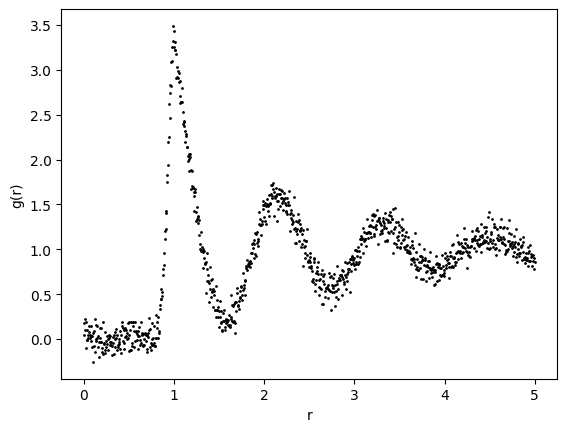

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.base import clone

def get_gr(r):
    a, b, L, m, t, d = 0.54, 5.4, 1.2, 7.4, 100, 3.3
    g1 = 1 + (r+1e-9)**(-m) * (d-1-L) + (r-1+L)/(r+1e-9)*np.exp(-a*(r-1))*np.cos(b*(r-1))
    g2 = d * np.exp(-t*(r-1)**2)
    g = g1*(r>=1) + g2*(r<1)
    return g

def plot_model(model,color="blue"):
    x = np.linspace(0, 5, 1000)
    y = model.predict(x.reshape(-1,1))
    plt.plot(x, y, color=color, linewidth=2, zorder=2)
    plt.xlabel("r")
    plt.ylabel("g(r)")

def plot_data(x, y):
    plt.scatter(x,y,s=1, color="black")
    plt.xlabel("r")
    plt.ylabel("g(r)")


np.random.seed(0)
X = np.linspace(0,5,1000).reshape(-1,1)
y = np.random.normal(get_gr(X.flatten()),0.1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=800)


plt.figure()
plot_data(X,y)
plt.show()


## Models
Below we define 3 sklearn neural network models `model1`, `model2`, and `model3`. Your goal is to find which is best using 10-fold cross-validation.

In [15]:
model1 = MLPRegressor([24], random_state=0, activation="tanh", max_iter=1000)
model2 = MLPRegressor([48,48], random_state=0, activation="tanh", max_iter=1000)
model3 = MLPRegressor([64,64, 64], random_state=0, activation="relu", max_iter=1000)


models = [model1, model2, model3]
for model in models:
    model.fit(X_train, y_train)
    

## Cross-validation folds


This cell creates 10-fold iterator objects in sklearn. Make note of how this is done.

We also provide code for computing the cross-validation score for average $R^2$ over validation folds. Note that the model is retrained on each fold, and weights/biases are reset each time with `sklearn.base.clone()`








In [16]:
folds = KFold(n_splits=10,random_state=0,shuffle=True)


scores1 = []
for train_idx, val_idx in folds.split(X_train):
    model1 = clone(model1)
    model1.fit(X_train[train_idx,:],y_train[train_idx])
    score = model1.score(X_train[val_idx,:],y_train[val_idx])
    scores1.append(score)
    print(f"Validation score: {score}")


score1 = np.mean(np.array(scores1))
print(f"Average validation score for Model 1: {score1}")


Validation score: 0.17567883199274337
Validation score: 0.19279856417941255
Validation score: 0.277493724970579
Validation score: 0.3104352357647894
Validation score: 0.20608404129798263
Validation score: 0.03790122395449669
Validation score: 0.1676244803676995
Validation score: 0.22025003724477432
Validation score: 0.14423712046918646
Validation score: 0.19894361702001595
Average validation score for Model 1: 0.193144687726168


## Your turn: validating models 2 and 3

Now follow the same procedure to get the average $R^2$ scores for `model2` and `model3` on validation folds. You can use the same KFold iterator.

In [17]:
# YOUR CODE GOES HERE
# model 2 validation
scores2 = []
for train_idx, val_idx in folds.split(X_train):
    model2 = clone(model2)
    model2.fit(X_train[train_idx,:],y_train[train_idx])
    score = model2.score(X_train[val_idx,:],y_train[val_idx])
    scores2.append(score)
    print(f"Validation score: {score}")

score2 = np.mean(np.array(scores2))
print(f"Average validation score for Model 2: {score2}")

# model 3 validation
scores3 = []
for train_idx, val_idx in folds.split(X_train):
    model3 = clone(model3)
    model3.fit(X_train[train_idx,:],y_train[train_idx])
    score = model3.score(X_train[val_idx,:],y_train[val_idx])
    scores3.append(score)
    print(f"Validation score: {score}")

score3 = np.mean(np.array(scores3))
print(f"Average validation score for Model 3: {score3}")

Validation score: 0.9135256064394238
Validation score: 0.92381162019413
Validation score: 0.9109428377428712
Validation score: 0.916683295227516
Validation score: 0.8980936123083956
Validation score: 0.9208009063665946
Validation score: 0.9123834705950664
Validation score: 0.8780032287365068
Validation score: 0.9281564779069267
Validation score: 0.95771300087561
Average validation score for Model 2: 0.9160114056393042
Validation score: 0.9629033605148654
Validation score: 0.9466107686883457
Validation score: 0.9518315048355763
Validation score: 0.9514051770741325
Validation score: 0.9229643307655356
Validation score: 0.9501422202077937
Validation score: 0.9322229519501164
Validation score: 0.9238931238090651
Validation score: 0.9461292855545796
Validation score: 0.9611128180031758
Average validation score for Model 3: 0.9449215541403186


# Comparing models

Which model had the best performance according to your validation study?

    From the validation study, Model 3 had the best performance.

Retrain this model on the full training dataset and report the R2 score on training and testing data. Then complete the code to plot the model prediction with the data using the `plot_model` function.



R2 score for Model 3 testing data: 0.9371864974414208
R2 score for Model 3 training data: 0.9547034601442719


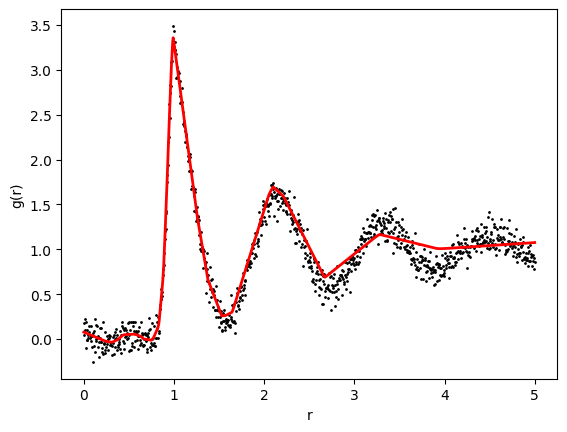

In [18]:
# YOUR CODE GOES HERE
# retrain Model 3 on the full training set
model3.fit(X_train, y_train)
r2_score_test = model3.score(X_test, y_test)
r2_score_train = model3.score(X_train, y_train)
print(f"R2 score for Model 3 testing data: {r2_score_test}")
print(f"R2 score for Model 3 training data: {r2_score_train}")


plt.figure()
plot_data(X,y)

# YOUR CODE GOES HERE
plot_model(model3, color="red")

plt.show()
